In [11]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize 
import seaborn as sns
import nltk

In [2]:
data = pd.read_csv('bbc.csv')

In [3]:
data.head()

Unnamed: 0                                               news      type
0           0  UK economy facing 'major risks'\n \n The UK ma...  business
1           1  Aids and climate top Davos agenda\n \n Climate...  business
2           2  Asian quake hits European shares\n \n Shares i...  business
3           3  India power shares jump on debut\n \n Shares i...  business
4           4  Lacroix label bought by US firm\n \n Luxury go...  business

In [4]:
data['category_id'] = data['type'].factorize()[0]

In [5]:
colslist = ['Index', 'news', 'type', 'category_id']
data.columns = colslist

In [6]:
data.head()

Index  ... category_id
0      0  ...           0
1      1  ...           0
2      2  ...           0
3      3  ...           0
4      4  ...           0

[5 rows x 4 columns]

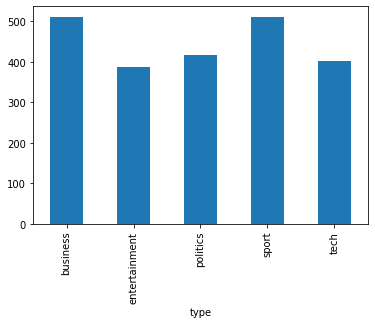

In [7]:
data.groupby('type').Index.count().plot.bar(ylim=0)

In [8]:
data.sample(5, random_state=0)

Index  ... category_id
384     384  ...           0
1983   1983  ...           4
985     985  ...           2
1386   1386  ...           3
1294   1294  ...           2

[5 rows x 4 columns]

### Basic preprocessing

In [13]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

In [14]:
stopwords = nltk.corpus.stopwords.words('english')

In [15]:
data['news_without_stopwords'] = data['news'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

In [16]:
print(len(data['news_without_stopwords'][0]))

1549


In [17]:
print(data['news_without_stopwords'][0])

UK economy facing 'major risks' The UK manufacturing sector continue face "serious challenges" next two years, British Chamber Commerce (BCC) said. The group's quarterly survey companies found exports picked last three months 2004 best levels eight years. The rise came despite exchange rates cited major concern. However, BCC found whole UK economy still faced "major risks" warned growth set slow. It recently forecast economic growth slow 3% 2004 little 2.5% 2005 2006. Manufacturers' domestic sales growth fell back slightly quarter, survey 5,196 firms found. Employment manufacturing also fell job expectations lowest level year. "Despite positive news export sector, worrying signs manufacturing," BCC said. "These results reinforce concern sector's persistent inability sustain recovery." The outlook service sector "uncertain" despite increase exports orders quarter, BCC noted. The BCC found confidence increased quarter across manufacturing service sectors although overall failed reach lev

In [18]:
#Porter Stemming
ps = PorterStemmer()

In [19]:
data['news_porter_stemmed'] = data['news_without_stopwords'].apply(lambda x: ' '.join([ps.stem(word) for word in x.split()]))

In [20]:
print(data['news_without_stopwords'][0])

UK economy facing 'major risks' The UK manufacturing sector continue face "serious challenges" next two years, British Chamber Commerce (BCC) said. The group's quarterly survey companies found exports picked last three months 2004 best levels eight years. The rise came despite exchange rates cited major concern. However, BCC found whole UK economy still faced "major risks" warned growth set slow. It recently forecast economic growth slow 3% 2004 little 2.5% 2005 2006. Manufacturers' domestic sales growth fell back slightly quarter, survey 5,196 firms found. Employment manufacturing also fell job expectations lowest level year. "Despite positive news export sector, worrying signs manufacturing," BCC said. "These results reinforce concern sector's persistent inability sustain recovery." The outlook service sector "uncertain" despite increase exports orders quarter, BCC noted. The BCC found confidence increased quarter across manufacturing service sectors although overall failed reach lev

In [21]:
print(data['news_porter_stemmed'][0])

UK economi face 'major risks' the UK manufactur sector continu face "seriou challenges" next two years, british chamber commerc (bcc) said. the group' quarterli survey compani found export pick last three month 2004 best level eight years. the rise came despit exchang rate cite major concern. however, bcc found whole UK economi still face "major risks" warn growth set slow. It recent forecast econom growth slow 3% 2004 littl 2.5% 2005 2006. manufacturers' domest sale growth fell back slightli quarter, survey 5,196 firm found. employ manufactur also fell job expect lowest level year. "despit posit news export sector, worri sign manufacturing," bcc said. "these result reinforc concern sector' persist inabl sustain recovery." the outlook servic sector "uncertain" despit increas export order quarter, bcc noted. the bcc found confid increas quarter across manufactur servic sector although overal fail reach level start 2004. the reduc threat interest rate increas contribut improv confidence,

In [22]:
#Converting to lowercase
data['news_porter_stemmed'] = data['news_porter_stemmed'].apply(lambda x: ' '.join(x.lower() for x in x.split()))

In [23]:
data['news_porter_stemmed'][0]

'uk economi face \'major risks\' the uk manufactur sector continu face "seriou challenges" next two years, british chamber commerc (bcc) said. the group\' quarterli survey compani found export pick last three month 2004 best level eight years. the rise came despit exchang rate cite major concern. however, bcc found whole uk economi still face "major risks" warn growth set slow. it recent forecast econom growth slow 3% 2004 littl 2.5% 2005 2006. manufacturers\' domest sale growth fell back slightli quarter, survey 5,196 firm found. employ manufactur also fell job expect lowest level year. "despit posit news export sector, worri sign manufacturing," bcc said. "these result reinforc concern sector\' persist inabl sustain recovery." the outlook servic sector "uncertain" despit increas export order quarter, bcc noted. the bcc found confid increas quarter across manufactur servic sector although overal fail reach level start 2004. the reduc threat interest rate increas contribut improv confi

In [24]:
#Removing Punctuation
data['news_porter_stemmed'] = data['news_porter_stemmed'].str.replace('[^\w\s]','')

In [25]:
data['news_porter_stemmed'][0]

'uk economi face major risks the uk manufactur sector continu face seriou challenges next two years british chamber commerc bcc said the group quarterli survey compani found export pick last three month 2004 best level eight years the rise came despit exchang rate cite major concern however bcc found whole uk economi still face major risks warn growth set slow it recent forecast econom growth slow 3 2004 littl 25 2005 2006 manufacturers domest sale growth fell back slightli quarter survey 5196 firm found employ manufactur also fell job expect lowest level year despit posit news export sector worri sign manufacturing bcc said these result reinforc concern sector persist inabl sustain recovery the outlook servic sector uncertain despit increas export order quarter bcc noted the bcc found confid increas quarter across manufactur servic sector although overal fail reach level start 2004 the reduc threat interest rate increas contribut improv confidence said the bank england rais interest r

In [26]:
#Low frequency term filtering (count < 3)
freq = pd.Series(' '.join(data['news_porter_stemmed']).split()).value_counts()

In [27]:
freq.head()

the     8121
said    7253
i       3263
mr      3045
it      2701
dtype: int64

In [28]:
freq2 = freq[freq <= 3]
freq2

shailendra         3
jupiter            3
competitiveness    3
nude               3
basingstoke        3
                  ..
chonggyu           1
wolfensohn         1
brailey            1
745bn              1
nonbritish         1
Length: 19554, dtype: int64

In [29]:
freq3 = list(freq2.index.values)
freq3

['shailendra',
 'jupiter',
 'competitiveness',
 'nude',
 'basingstoke',
 'auditorium',
 '80gb',
 'kilobit',
 '36yearold',
 'inequ',
 'translated',
 'codecrack',
 'mcconnell',
 'musampa',
 'singing',
 'touchyfeely',
 'gabbidon',
 'twogoal',
 'estel',
 'cherkaski',
 'achievements',
 'jedi',
 'onstag',
 'improvis',
 'reunion',
 'leahy',
 'culprit',
 'weed',
 'backfir',
 'blackman',
 'prototype',
 'narraway',
 'wraztv',
 'flavour',
 'pearl',
 'imparti',
 'bundesbank',
 'blacklist',
 'claudia',
 'residenti',
 'inevitable',
 'leadup',
 'canadabas',
 'yulia',
 'outcri',
 'ashburton',
 'clamshel',
 'lockhe',
 'curs',
 'nake',
 'versace',
 'bours',
 'southan',
 'believed',
 '168',
 'differences',
 'conversations',
 'headbut',
 'possession',
 'oncefam',
 'ranges',
 'fiveset',
 'bevan',
 'oclock',
 'tulu',
 'powergen',
 'murki',
 'goldstein',
 'imminent',
 'tpm',
 'refuse',
 'incarn',
 'compass',
 'sprain',
 'edinburghbas',
 'catalogue',
 'mammal',
 'cutout',
 'addison',
 'hopkin',
 'sach',
 'dum

In [30]:
data['news_porter_stemmed'] = data['news_porter_stemmed'].apply(lambda x: ' '.join([word for word in x.split() if word not in (freq3)]))

In [31]:
data = data[['Index', 'type', 'category_id', 'news_porter_stemmed']]

In [32]:
data

Index  ...                                news_porter_stemmed
0         0  ...  uk economi face major risks the uk manufactur ...
1         1  ...  aid climat top davo agenda climat chang fight ...
2         2  ...  asian quak hit european share share europe lea...
3         3  ...  india power share jump debut share india large...
4         4  ...  lacroix label bought us firm luxuri good group...
...     ...  ...                                                ...
2220   2220  ...  warn window word file write microsoft word doc...
2221   2221  ...  fast lift rise record book two highspe lift wo...
2222   2222  ...  nintendo add media play ds nintendo releas ada...
2223   2223  ...  fast move phone virus appear secur firm warn s...
2224   2224  ...  hacker threat apple itun user apple music juke...

[2225 rows x 4 columns]

### TF-IDF

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2))

In [38]:
features = tfidf.fit_transform(data.news_porter_stemmed).toarray()
labels = data.category_id
features.shape

(2225, 16646)

In [39]:
data.columns = ['Index', 'newstype', 'category_id', 'news_porter_stemmed']

In [40]:
category_id_df = data[['newstype', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'newstype']].values)

In [41]:
from sklearn.feature_selection import chi2

N = 3
for newstype, category_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(newstype))
    print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))

# 'business':
  . Most correlated unigrams:
       . oil
       . growth
       . bank
  . Most correlated bigrams:
       . interest rate
       . analyst said
       . stock market
# 'entertainment':
  . Most correlated unigrams:
       . actor
       . star
       . film
  . Most correlated bigrams:
       . best film
       . the film
       . box offic
# 'politics':
  . Most correlated unigrams:
       . blair
       . tori
       . labour
  . Most correlated bigrams:
       . lib dem
       . toni blair
       . mr blair
# 'sport':
  . Most correlated unigrams:
       . champion
       . coach
       . cup
  . Most correlated bigrams:
       . australian open
       . grand slam
       . six nation
# 'tech':
  . Most correlated unigrams:
       . technolog
       . comput
       . user
  . Most correlated bigrams:
       . peopl use
       . let peopl
       . mobil phone


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

model = LogisticRegression(random_state=0)

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, data.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)
y_pred = model.predict(X_test)

In [52]:
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9823129251700681
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       173
           1       0.99      0.98      0.99       123
           2       0.96      0.98      0.97       140
           3       0.99      0.99      0.99       173
           4       0.98      0.97      0.98       126

    accuracy                           0.98       735
   macro avg       0.98      0.98      0.98       735
weighted avg       0.98      0.98      0.98       735

